In [ ]:
!pip install opencv-python

In [6]:
extracting the compessed Dataset
from zipfile import ZipFile
dataset = './zip_data/face_mask_dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted successfully')

The dataset is extracted successfully


## Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [2]:
files_with_mask_images = os.listdir('./data/with_mask')
files_without_mask_images = os.listdir('./data/without_mask')


In [3]:
print('Number of images with mask:',len(files_with_mask_images))
print('Number of images without mask:',len(files_with_mask_images))

Number of images with mask: 3725
Number of images without mask: 3725


#### Creating Labels

In [4]:
labels = [1]* len(files_with_mask_images) + [0] * len(files_without_mask_images)

In [5]:
print('Total labels: ',len(labels))

Total labels:  7553


#### Visualize data

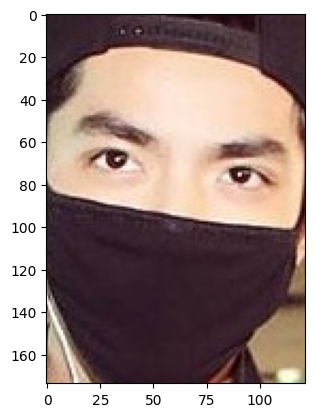

In [6]:
img = mpimg.imread('./data/with_mask/'+files_with_mask_images[-1])
plt.imshow(img)

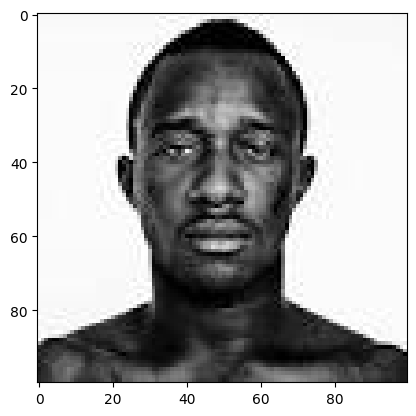

In [7]:
img = mpimg.imread('./data/without_mask/'+files_without_mask_images[0])
plt.imshow(img)

#### Preprocessing

In [8]:
data = []
image_paths = ['./data/with_mask/', './data/without_mask/']

for path in image_paths:

    files = os.listdir(path)
    for file in files:
        #read as nparray
        img = mpimg.imread(path+file)

        # Check if the image has only one channel (grayscale)
        # If so, convert it to RGB by duplicating the channel three times
        if img.ndim == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 4:
            # Convert RGBA to RGB
            img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
        #resize to keep all image size same
        img = cv2.resize(img, (128,128))
        data.append(img)

In [9]:
print('Total data :', len(data))

Total data : 7553


In [10]:
print(type(data))
print(data[0].shape)

<class 'list'>
(128, 128, 3)


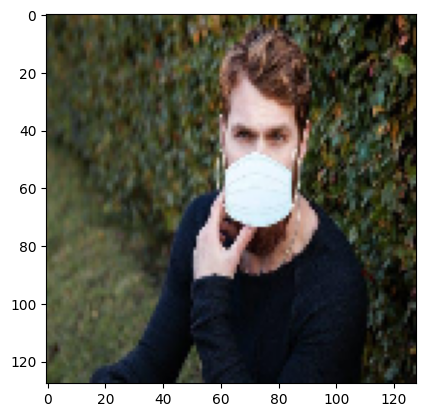

In [11]:
plt.imshow(data[0])

##### Converting to nparray

In [12]:
X = np.array(data)
Y = np.array(labels)

In [13]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


### Split into train and test
###### for this task, validation will be skiped

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


##### Normalize

In [16]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

### CNN MODEL

In [17]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [25]:
n_classes = 2
model = keras.Sequential()
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))


#Output layer
model.add(Dense(n_classes, activation='sigmoid'))

#### compile the neural network

In [26]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

##### Traing model

In [27]:
info = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 93s 540ms/step - loss: 0.4361 - acc: 0.8080 - val_loss: 0.2607 - val_acc: 0.8992
Epoch 2/10
170/170 [==============================] - 93s 549ms/step - loss: 0.2867 - acc: 0.8913 - val_loss: 0.3089 - val_acc: 0.8545
Epoch 3/10
170/170 [==============================] - 92s 541ms/step - loss: 0.2377 - acc: 0.9077 - val_loss: 0.2035 - val_acc: 0.9174
Epoch 4/10
170/170 [==============================] - 93s 547ms/step - loss: 0.2002 - acc: 0.9301 - val_loss: 0.1972 - val_acc: 0.9140
Epoch 5/10
170/170 [==============================] - 92s 540ms/step - loss: 0.1631 - acc: 0.9400 - val_loss: 0.1613 - val_acc: 0.9455
Epoch 6/10
170/170 [==============================] - 92s 541ms/step - loss: 0.1488 - acc: 0.9489 - val_loss: 0.1641 - val_acc: 0.9504
Epoch 7/10
170/170 [==============================] - 92s 542ms/step - loss: 0.1377 - acc: 0.9494 - val_loss: 0.1753 - val_acc: 0.9438
Epoch 8/10
170/170 [==============================] - 9

##### Model Evaluation

In [28]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuray : ', accuracy)

48/48 [==============================] - 6s 124ms/step - loss: 0.1425 - acc: 0.9517
Test Accuray :  0.9516876339912415


##### Visualize the loss and accuracy

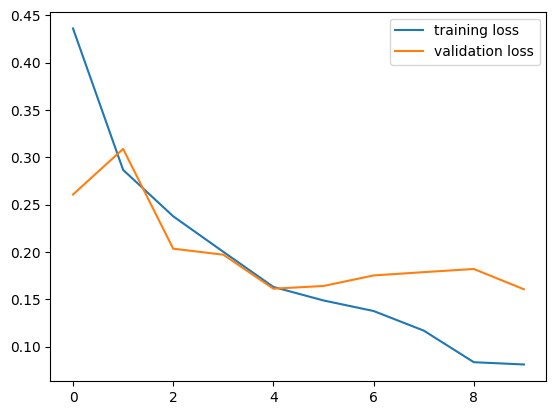

In [29]:
plt.plot(info.history['loss'], label='training loss')
plt.plot(info.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

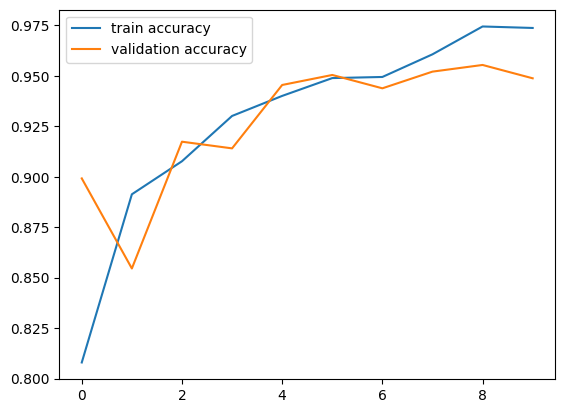

In [30]:
plt.plot(info.history['acc'], label='train accuracy')
plt.plot(info.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

### Prediction

In [44]:
def predict_img(input_image_path):
    input_image = mpimg.imread(input_image_path)

    if input_image.ndim == 2:
        input_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2RGB)
    elif img.shape[2] == 4:
        # Convert RGBA to RGB
        input_image = cv2.cvtColor(input_image, cv2.COLOR_RGBA2RGB)
    
    plt.imshow(input_image)
    input_image_resized = cv2.resize(input_image, (128,128))
    input_image_scaled = input_image_resized/255
    input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
    input_prediction = model.predict(input_image_reshaped)
    
    input_pred_label = np.argmax(input_prediction)
    
    if input_pred_label == 1:
    
      print('The person in the image is wearing a mask')
    
    else:
    
      print('The person in the image is not wearing a mask')

1/1 [==============================] - 0s 23ms/step
The person in the image is wearing a mask


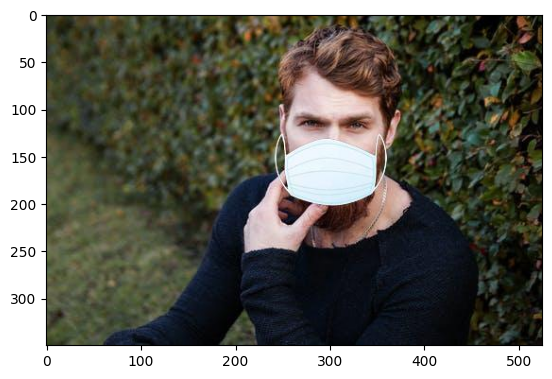

In [45]:
predict_img('./data/with_mask/with_mask_1.jpg')


1/1 [==============================] - 0s 26ms/step
The person in the image is not wearing a mask


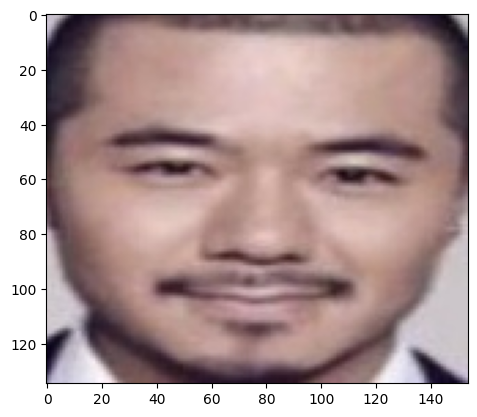

In [46]:
predict_img('./data/without_mask/without_mask_10.jpg')


1/1 [==============================] - 0s 30ms/step
The person in the image is not wearing a mask


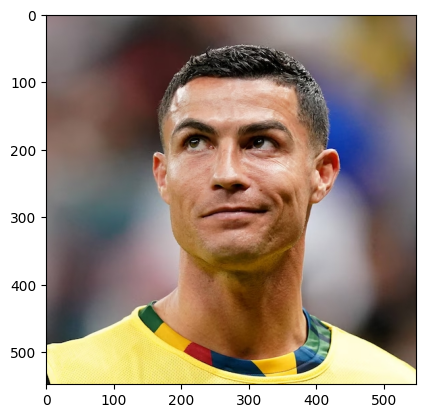

In [52]:
predict_img('./data/ronaldo.jpg')